In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
mnist = keras.datasets.fashion_mnist

In [ ]:
((trainX, trainY), (testX, testY)) = mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt

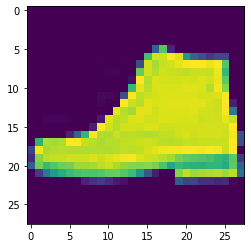

In [ ]:
plt.imshow(trainX[42])

In [ ]:
trainX[0].shape

(28, 28)

In [ ]:
model = keras.Sequential(
    [keras.layers.Flatten(input_shape = (28, 28)),
     keras.layers.Dense(units = 128, activation='relu'),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(10, activation='softmax')
    ]
)

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class MyCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs['loss'] < 0.4:
      print(f'Early stopping on epoch {epoch}')
      self.model.stop_training = True


In [ ]:
callbacks = MyCallback()

In [ ]:
trainX = trainX / 255.0
testX = testX / 255.0

In [ ]:
model.fit(trainX, trainY, epochs = 10, callbacks= [callbacks])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4844 - accuracy: 0.8273
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3610 - accuracy: 0.8673
Early stopping on epoch 1


In [ ]:
model.evaluate(testX, testY)

313/313 [==============================] - 1s 1ms/step - loss: 0.3836 - accuracy: 0.8583


[0.38357457518577576, 0.858299970626831]